# Author: AYUSHI MISHRA

### Task: 3 - Prediction Using Decision Tree Algorithm

Problem Statement: In this task, we have to create the Decision Tree classifier and represent it visually From the given ‘Iris’  dataset.

### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
target = pd.Categorical.from_codes(data.target, data.target_names)

### Head of Data

In [2]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
target = pd.get_dummies(target)
target

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


### Splitting Data into Training and Test Sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], target, random_state=0)

### Building Decision Tree Model

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [6]:
pred = clf.predict(X_test)
pred

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

### Evaluating Model

In [7]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print("score:",score)

score: 0.8947368421052632


### Visualizing Decision Trees

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


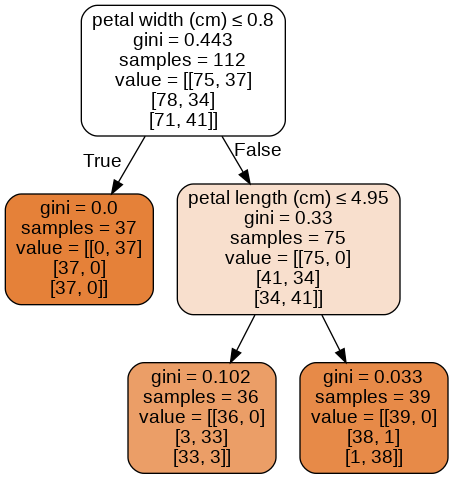

In [8]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from IPython.display import Image 
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, feature_names=data.feature_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Tuning the Depth of a Tree

In [9]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, Y_train)    
    score = clf.score(X_test, Y_test)
    accuracy.append(score)
    
print(accuracy)

[0.5789473684210527, 0.8947368421052632, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


### Ploting best depth parameter value

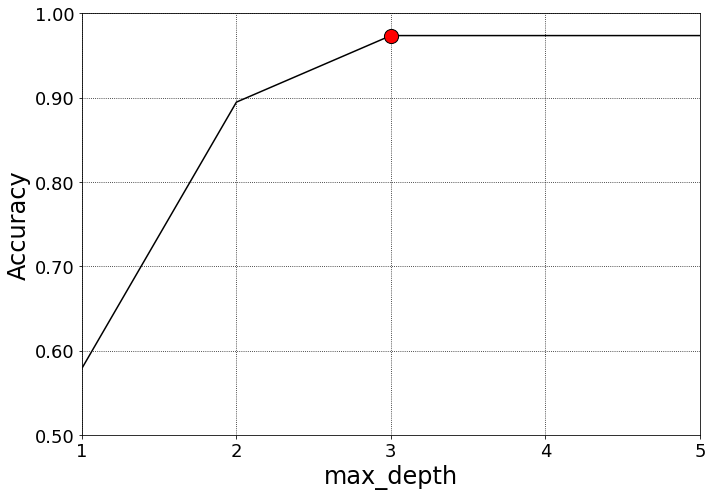

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,7));

marker_style = dict(color = 'tab:blue', linestyle = ':', marker = 'o', markersize = 15, markerfacecoloralt = 'tab:red')
ax.plot(max_depth_range, accuracy, color = 'k')
s = ax.scatter(max_depth_range[2], accuracy[2], color = 'r', s = 200, zorder = 10, marker = 'o',)
s.set_edgecolor( 'black' )
ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True, axis = 'both', zorder = 1, linestyle = ':', color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()


 Since the graph above shows that the best accuracy for the model is when the parameter max_depth is greater than or equal to 3,we will set the max_depth = 3.

### Building Decision Tree Model and evaluate

In [13]:
clf1 = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf1.fit(X_train, Y_train)

score = clf1.score(X_test, Y_test)
print("score:",score)

score: 0.9736842105263158


### Visualizing Decision Trees

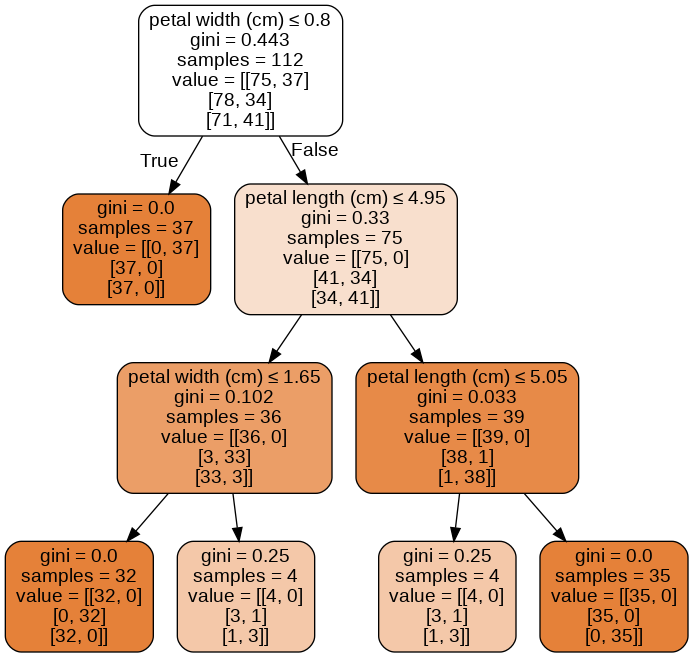

In [14]:
dot_data = StringIO()
export_graphviz(clf1, out_file = dot_data, feature_names = data.feature_names, filled = True, rounded = True, special_characters = True)
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph1.create_png())

### Feature Importance

In [15]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.578
2,petal length (cm),0.422
0,sepal length (cm),0.000
1,sepal width (cm),0.000
